## Objective

#### Forecasting future sales of gifts shop using Training data on 2009-10 and predicting for 2010-11.
1. Data Scrubbing to combine and get total sales for a product.
2. Plotting Time vs Sales to see Seasonality/Trend
3. Checking stationarity using Dikki Fuller Test and rolling statistics
4. Make the data stationary using transformation like Differencing.
5. Finding p,d, q using acf and pacf plots
6. Modelling using ARIMA and forecasting for future 30 days sales.
7. Evaluating forecast on metrics like MAPE and MAE.

In [147]:
## Importing required packages/libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10
import scipy.stats as stats

In [148]:
## Extracting data in the form of dataframe from sheet name-Year 2009-2010
sales_train_df= pd.read_excel('online_retail_II.xlsx', engine='openpyxl', sheet_name='Year 2009-2010')
print(sales_train_df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [149]:
## Calculating number of rows and columns in the dataset
sales_train_df.shape

(525461, 8)

In [150]:
## Extracting Test data into dataframe from sheet name-Year 2010-2011
sales_test_df= pd.read_excel('online_retail_II.xlsx', engine='openpyxl', sheet_name='Year 2010-2011')
print(sales_test_df.head())

  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00   2.55      17850.0  United Kingdom  
1 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
2 2010-12-01 08:26:00   2.75      17850.0  United Kingdom  
3 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  
4 2010-12-01 08:26:00   3.39      17850.0  United Kingdom  


EDA- Exploratory Data Analysis 

In [151]:
# General Function to calculate missing dates and no. of missing dates in the date column from the dataset
from datetime import datetime,date
def missing_dates(df, col_date):
    df['Date_n'] = pd.to_datetime(df[col_date]).dt.date
    strt_dt = df['Date_n'].values[0].strftime('%Y-%m-%d')
    end_dt = df['Date_n'].values[-1].strftime('%Y-%m-%d')
    missing_dates = pd.date_range(start=strt_dt, end=end_dt).difference(df['Date_n']).strftime('%Y-%m-%d').tolist()
    length_missing = len(missing_dates)
    return missing_dates, length_missing

In [152]:
#Calculate missing dates and no. of missing dates for sales dataset
salesdf = sales_train_df.copy(deep = False)
Dates_missing, Total_missing_dates = missing_dates(salesdf, 'InvoiceDate')
print("All missing dates in the dataset:\n", Dates_missing, "\nNo. of missing dates:", Total_missing_dates)

All missing dates in the dataset:
 ['2009-12-12', '2009-12-19', '2009-12-24', '2009-12-25', '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-01', '2010-01-02', '2010-01-03', '2010-01-09', '2010-01-16', '2010-01-23', '2010-01-30', '2010-02-06', '2010-02-13', '2010-02-20', '2010-02-27', '2010-03-06', '2010-03-13', '2010-03-20', '2010-03-27', '2010-04-02', '2010-04-03', '2010-04-04', '2010-04-05', '2010-04-10', '2010-04-17', '2010-04-24', '2010-05-01', '2010-05-03', '2010-05-08', '2010-05-15', '2010-05-22', '2010-05-29', '2010-05-31', '2010-06-05', '2010-06-12', '2010-06-19', '2010-06-26', '2010-07-03', '2010-07-10', '2010-07-17', '2010-07-24', '2010-07-31', '2010-08-07', '2010-08-14', '2010-08-21', '2010-08-28', '2010-08-30', '2010-09-04', '2010-09-11', '2010-09-18', '2010-09-25', '2010-10-02', '2010-10-09', '2010-10-16', '2010-10-23', '2010-10-30', '2010-11-06', '2010-11-13', '2010-11-20', '2010-11-27', '2010-12-04'] 
No. of missing dates: 67


In [153]:
salestestdf = sales_test_df.copy(deep = False)
#print(salestestdf.head())
Dates_missing_test, Total_missing_dates_test = missing_dates(salestestdf, 'InvoiceDate')
print("All missing dates in test dataset:\n", Dates_missing_test, "\nNo. of missing dates:", Total_missing_dates_test)


All missing dates in test dataset:
 ['2010-12-04', '2010-12-11', '2010-12-18', '2010-12-24', '2010-12-25', '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-01', '2011-01-02', '2011-01-03', '2011-01-08', '2011-01-15', '2011-01-22', '2011-01-29', '2011-02-05', '2011-02-12', '2011-02-19', '2011-02-26', '2011-03-05', '2011-03-12', '2011-03-19', '2011-03-26', '2011-04-02', '2011-04-09', '2011-04-16', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-29', '2011-04-30', '2011-05-02', '2011-05-07', '2011-05-14', '2011-05-21', '2011-05-28', '2011-05-30', '2011-06-04', '2011-06-11', '2011-06-18', '2011-06-25', '2011-07-02', '2011-07-09', '2011-07-16', '2011-07-23', '2011-07-30', '2011-08-06', '2011-08-13', '2011-08-20', '2011-08-27', '2011-08-29', '2011-09-03', '2011-09-10', '2011-09-17', '2011-09-24', '2011-10-01', '2011-10-08', '2011-10-15', '2011-10-22', '2011-10-29', '2011-11-05', '2011-11-12', '2011-11-19', '2011-11-26', '2011-12-03

In [159]:
#checking negative values and making them absolute
def check_Pos_n_makAbs(df, col_nme):
    if df[df[col_nme] < 0].shape[0] > 0:
        print(df[df[col_nme] < 0].shape[0])
        df[col_nme]= df[col_nme].abs()


In [157]:
check_Pos_n_makAbs(salesdf, 'Quantity' )

12326


In [161]:
check_Pos_n_makAbs(salestestdf, 'Quantity' )

10624


In [163]:
check_Pos_n_makAbs(salesdf, 'Price' )

3


In [164]:
check_Pos_n_makAbs(salestestdf, 'Price' )

2


In [165]:
## Calculating sales based on quantity and Price
salesdf['Sales'] = salesdf['Quantity'] * salesdf['Price']
salesdf.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date_n,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,30.0


In [166]:
## Calculating sales based on quantity and Price
salestestdf['Sales'] = salestestdf['Quantity'] * salestestdf['Price']
salestestdf.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date_n,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [169]:
#missing values in all columns except date
def missing_vals(df, col_list):
    for i in col_list:
        print(i, "has",df[i].isna().sum(), "nan values")
    

In [170]:
col_lst = ['Invoice', 'StockCode', 'Description', 'Quantity', 'Price', 'Customer ID', 'Country']
missing_vals(salesdf, col_lst)

Invoice has 0 nan values
StockCode has 0 nan values
Description has 2928 nan values
Quantity has 0 nan values
Price has 0 nan values
Customer ID has 107927 nan values
Country has 0 nan values


In [115]:
# Dataframe to define the range of dates between two dates in datetime64[ns] format
idx = pd.date_range(start=min(salesdf.Date_n) , end=max(salesdf.Date_n))
# print(min(salesdf.Date_n),max(salesdf.Date_n) )
# print(idx) 
idx = pd.DataFrame(idx, columns=['Date_n'])
idx
#print(idx.astype('datetime64[ns]'))
# print(idx.dtypes)

,Date_n
0,2009-12-01
1,2009-12-02
2,2009-12-03
3,2009-12-04
4,2009-12-05
...,...
369,2010-12-05
370,2010-12-06
371,2010-12-07
372,2010-12-08


In [177]:
# This Function performs the following tasks:
#  to make date column (as dataframe) to define the range of dates between two dates in datetime64[ns] format 
# Grouping Date and Sales column using DateTimeIndex and groupby function and then merging this grouped dataframe with that dataframe
#  which defines the range of dates between min and max dates for that dataset.
def df_preprocessing(df, col_dt, col_out, key, win):
    idx = pd.date_range(start=min(df[col_dt]) , end=max(df[col_dt]))
    idx = pd.DataFrame(idx, columns=[col_dt]) 
    new_df = pd.merge(idx, df.groupby(pd.DatetimeIndex(df[col_dt]))[col_out].sum().reset_index(), how="left", on=[key])
    new_df[col_out]= new_df[col_out].fillna(new_df[col_out].fillna(0).rolling(window =win).mean())
    out = new_df[[col_dt, col_out]]
    indexed_out_df = out.set_index([col_dt])
    return indexed_out_df





In [214]:
indexed_sumsales= df_preprocessing(salesdf, 'Date_n', 'Sales', 'Date_n', 5)

In [305]:
indexed_testsales = df_preprocessing(salestestdf, 'Date_n', 'Sales', 'Date_n',5)

In [181]:
# idxt = pd.date_range(start=min(salestestdf.Date_n) , end=max(salestestdf.Date_n))
# idxt = pd.DataFrame(idxt, columns=['Date_n'])

In [182]:

# sum_sales_train_df = pd.merge(idx, salesdf.groupby(pd.DatetimeIndex(salesdf['Date_n']))['Sales'].sum().reset_index(), how="left", on=["Date_n"])
# print(sum_sales_train_df.Sales.isna().sum())

In [183]:
# # Fill Sales with rolling mean
# sum_sales_train_df['Sales']= sum_sales_train_df['Sales'].fillna(sum_sales_train_df['Sales'].fillna(0).rolling(window =5).mean())
# sum_sales_train_df.Sales.isna().sum()

In [184]:
# sumsales = sum_sales_train_df[['Date_n', 'Sales']]
# indexed_sumsales = sumsales.set_index(['Date_n'])
# indexed_sumsales


In [185]:
# sum_sales_test_df = pd.merge(idxt, salestestdf.groupby(pd.DatetimeIndex(salestestdf['Date_n']))['Sales'].sum().reset_index(), how="left", on=["Date_n"])
# sum_sales_test_df['Sales']= sum_sales_test_df['Sales'].fillna(sum_sales_test_df['Sales'].fillna(0).rolling(window =3).mean())
# sumsalestest = sum_sales_test_df[['Date_n', 'Sales']]
# indexed_sumsales_test = sumsalestest.set_index(['Date_n'])
# indexed_sumsales_test.Sales

In [186]:
#Filling nan values with forward fill
#indexed_sumsales['Sales']=indexed_sumsales['Sales'].fillna(method="ffill")
#indexed_sumsales.Sales.isnull().sum()

In [187]:
#Function to visualize data
def visualize_data(xlabl, ylabl, title, df, col_out):
    plt.xlabel(xlabl)
    plt.ylabel(ylabl)
    plt.title(title)
    plt.plot(df[col_out])
    plt.show()
    # indexed_sumsales.plot(figsize=(14,8), title='Sales for 2009-10') # Alternative way to plot
    

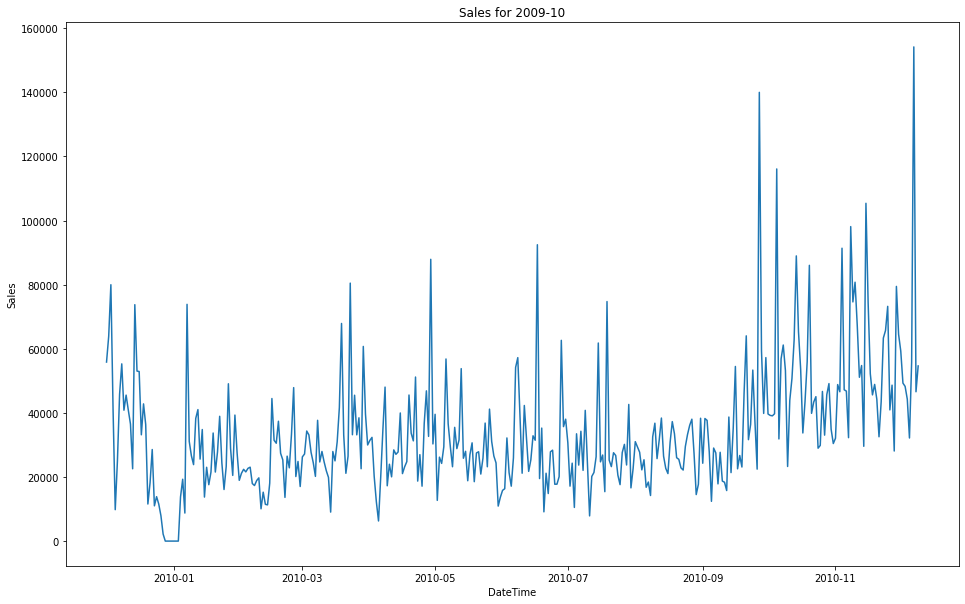

In [188]:
visualize_data('DateTime', 'Sales', 'Sales for 2009-10', indexed_sumsales, 'Sales')

In [189]:
## Determing rolling statistics
# rolmean = indexed_sumsales['Sales'].rolling(window = 12).mean()
# rolstd = indexed_sumsales['Sales'].rolling(window = 12).std()
# print(rolmean, rolstd)

In [190]:
#Plot rolling statistics
# orig = plt.plot(indexed_sumsales['Sales'], color = 'blue', label='Original')
# mean = plt.plot(rolmean, color = 'red', label='Rolling Mean')
# std = plt.plot(rolstd, color = 'black', label='Rolling standard deviation')
# plt.legend(loc = 'best')
# plt.title('Rolling Mean and Standard Deviation')
# plt.show(block=False)

##### ADF(Augmented Dickey Fuller Test)

A time series is said to be stationary if its statistical properties do not change with time.
The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. It checks if your time series is stationary or not. A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, are all constant over time. Such statistics are useful as descriptors of future behavior only if the series is stationary.

The hypotheses for the test:
The null hypothesis for this test is that the time series is non-stationary.
The alternate hypothesis for this test is that the time series is stationary.

If ADF statistic < Critical Value, Reject the null Hypothesis otherwise fail to reject or accept the null hypothesis.


In [191]:
# Code for Dikki Fuller Test in the form of Function
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(df):
    result=adfuller(df)
    print('Results of Dikki Fuller Test:')
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    print('Critical Values:')
    for k, val in result[4].items():
        print('\t%s: %.3f' % (k, val))
        
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [216]:
adfuller_test(indexed_sumsales['Sales'])


Results of Dikki Fuller Test:
ADF Test Statistic : -2.156097248620785
p-value : 0.22256351407434716
#Lags Used : 13
Number of Observations Used : 360
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [217]:
# log_sum_sales_traindf = np.log(indexed_sumsales['Sales'])
# log_sum_sales_traindf = log_sum_sales_traindf.replace([np.inf, -np.inf], np.nan)
# log_sum_sales_traindf = log_sum_sales_traindf.fillna(log_sum_sales_traindf.fillna(0).rolling(window =25).mean())
# plt.plot(log_sum_sales_traindf)

In [218]:
# np.isinf(log_sum_sales_traindf).values.sum()

In [219]:
# movingAverage = log_sum_sales_traindf.rolling(window=60).mean()
# movingSTD = log_sum_sales_traindf.rolling(window=60).std()
# plt.plot(log_sum_sales_traindf)
# plt.plot(movingAverage, color='red', label='movingAverage')
# plt.plot(movingSTD, color='black', label='movingSTD')

In [220]:
# logScaleMinusmovingAverage = log_sum_sales_traindf - movingAverage
# logScaleMinusmovingAverage.head(12)

# #Remove Nan values
# logScaleMinusmovingAverage.dropna(inplace=True)
# logScaleMinusmovingAverage.head(10)

In [221]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, win):
    
    ## Determing rolling statistics
    movingAvg = timeseries.rolling(window = win).mean()
    movingStd= timeseries.rolling(window = win).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label='Original')
    mean = plt.plot(movingAvg, color = 'red', label='Rolling Mean')
    std = plt.plot(movingStd, color = 'black', label='Rolling standard deviation')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #Perform Dikki Fuller Test
    result=adfuller(timeseries, autolag='AIC')
    print('Results of Dikki Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : %.3f  '% (value) )
    print('Critical Values:')
    for k, val in result[4].items():
        print('\t%s: %.3f' % (k, val))
        
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [222]:
# test_stationarity(logScaleMinusmovingAverage,30)

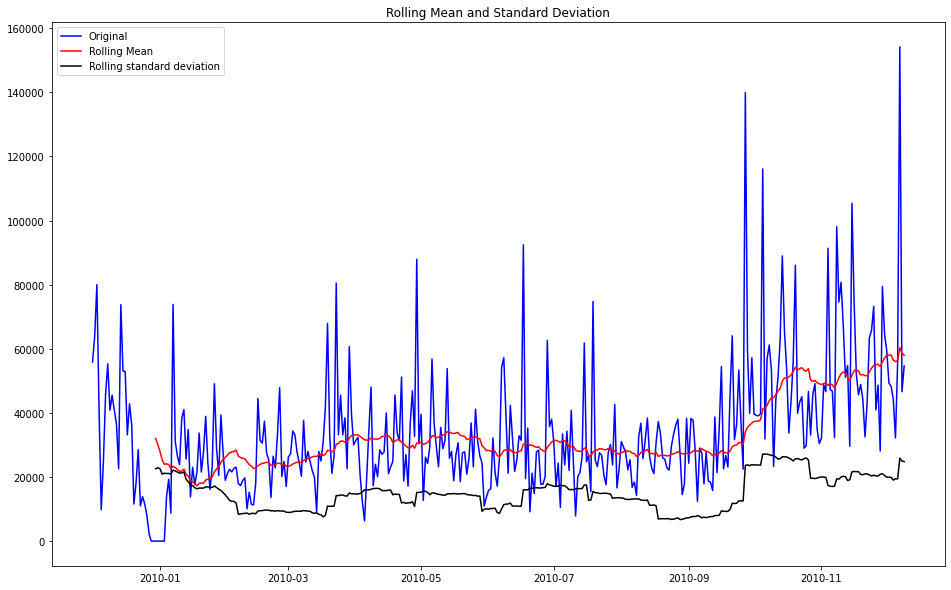

Results of Dikki Fuller Test:
ADF Test Statistic : -2.156  
p-value : 0.223  
#Lags Used : 13.000  
Number of Observations Used : 360.000  
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [223]:
test_stationarity(indexed_sumsales['Sales'],30)


In [224]:
# #Weighted Average of timeseries so to see the trend
# exponentialDecayWeightedAverage = log_sum_sales_traindf.ewm(halflife=365, min_periods=0, adjust=True).mean()

# plt.plot(log_sum_sales_traindf)
# plt.plot(exponentialDecayWeightedAverage, color ='red')

In [225]:
# np.isinf(log_sum_sales_traindf).values.sum()

In [226]:
# logScaleMinusexponentialDecayWeightedAverage = log_sum_sales_traindf - exponentialDecayWeightedAverage
# logScaleMinusexponentialDecayWeightedAverage.dropna(inplace=True)
# test_stationarity(logScaleMinusexponentialDecayWeightedAverage, 50)

Differencing: Transforming data by differencing with its previous values to make the data stationary

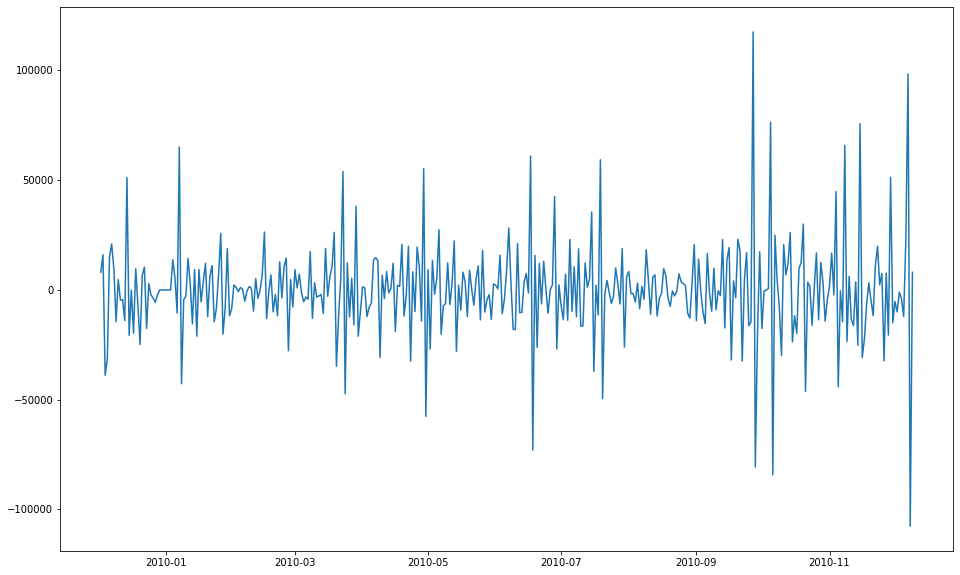

In [227]:
sumSalesdf =  indexed_sumsales['Sales'] 
sumSalesDiffShifting = sumSalesdf - sumSalesdf.shift(1)
plt.plot(sumSalesDiffShifting)
# res = adfuller(y1)
# print('p-value: %f' % res[1])
# print('Augmented Dickey Fuller(ADF) Statistic: %f' % res[0])
# print('Critical Values:')
# for k, val in res[4].items():
#     print('\t%s: %.3f' % (k, val))

# if res[0] < res[4]["5%"]:
#     print ("Reject Null Hypothesis - Time Series is Stationary")
# else:
#     print ("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

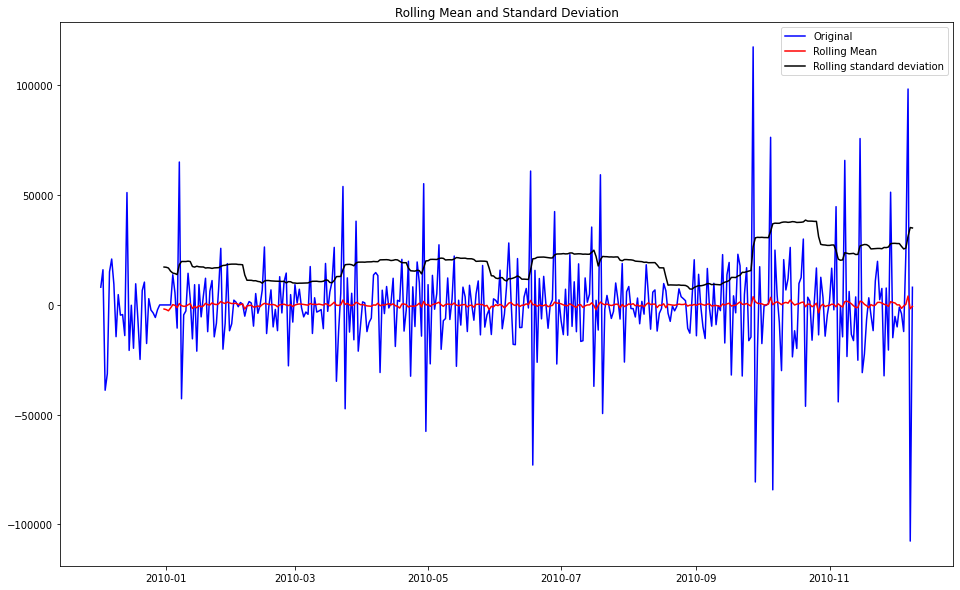

Results of Dikki Fuller Test:
ADF Test Statistic : -7.666  
p-value : 0.000  
#Lags Used : 12.000  
Number of Observations Used : 360.000  
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [228]:
sumSalesDiffShifting.dropna(inplace=True)
test_stationarity(sumSalesDiffShifting,30)

In [229]:
# logSalesDiffShifting = log_sum_sales_traindf - log_sum_sales_traindf.shift(1)
# plt.plot(logSalesDiffShifting)

In [230]:
# logSalesDiffShifting.dropna(inplace=True)
# test_stationarity(logSalesDiffShifting,30)

In [231]:
# y2 = np.log(sumSalesDiffShifting-np.min(sumSalesDiffShifting)+1)
# y2.plot()
# test_stationarity(y2)
# # res = adfuller(y2)
# # print('p-value: %f' % res[1])
# # print('Augmented Dickey Fuller(ADF) Statistic: %f' % res[0])
# # print('Critical Values:')
# # for k, val in res[4].items():
# #     print('\t%s: %.3f' % (k, val))

# # if res[0] < res[4]["5%"]:
# #     print ("Reject Null Hypothesis - Time Series is Stationary")
# # else:
# #     print ("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

Decomposition of data into original, trend, seasonality and residual

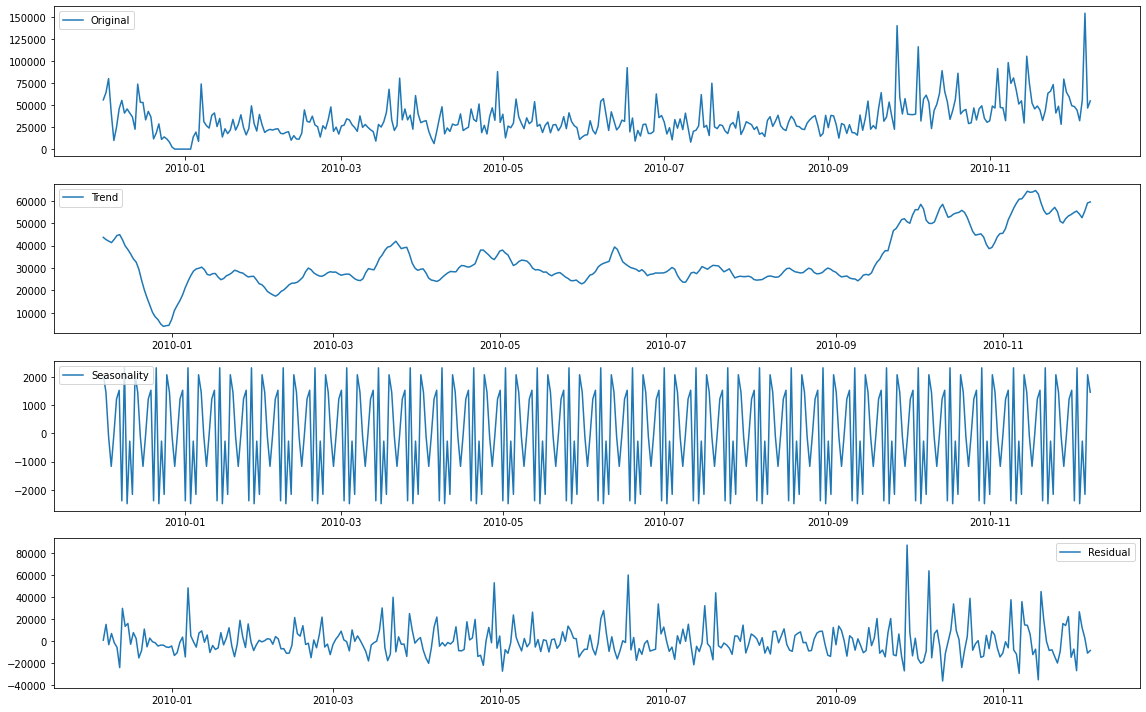

In [232]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed_sumsales, model='additive', period=12)

trnd = decomposition.trend
seasonl = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexed_sumsales, label ='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trnd, label ='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonl, label ='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label ='Residual')
plt.legend(loc='best')
plt.tight_layout()



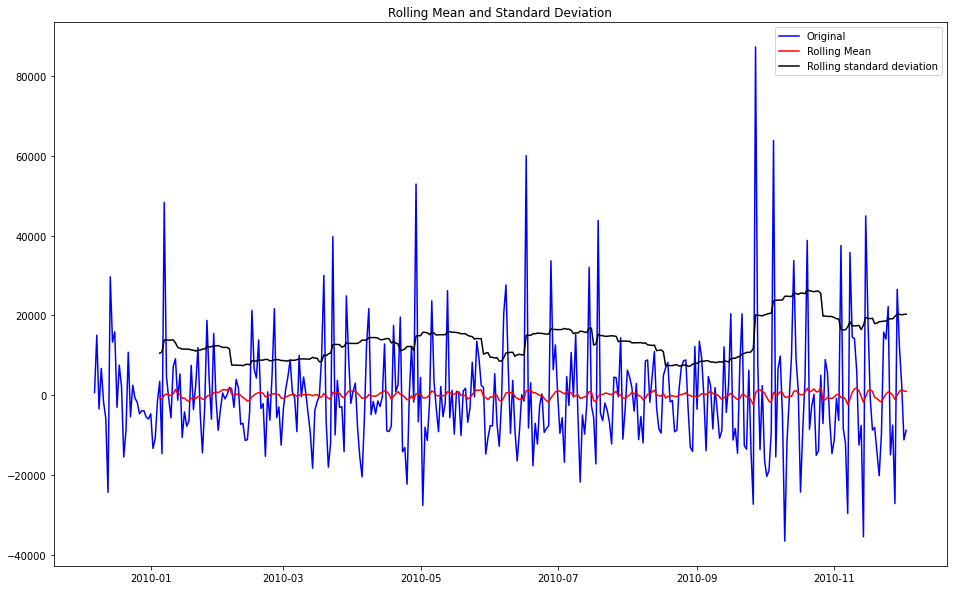

Results of Dikki Fuller Test:
ADF Test Statistic : -8.724  
p-value : 0.000  
#Lags Used : 17.000  
Number of Observations Used : 344.000  
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [234]:
#checking stationary for residuals
decomposedlogData = residual
decomposedlogData.dropna(inplace=True)
test_stationarity(decomposedlogData,30)

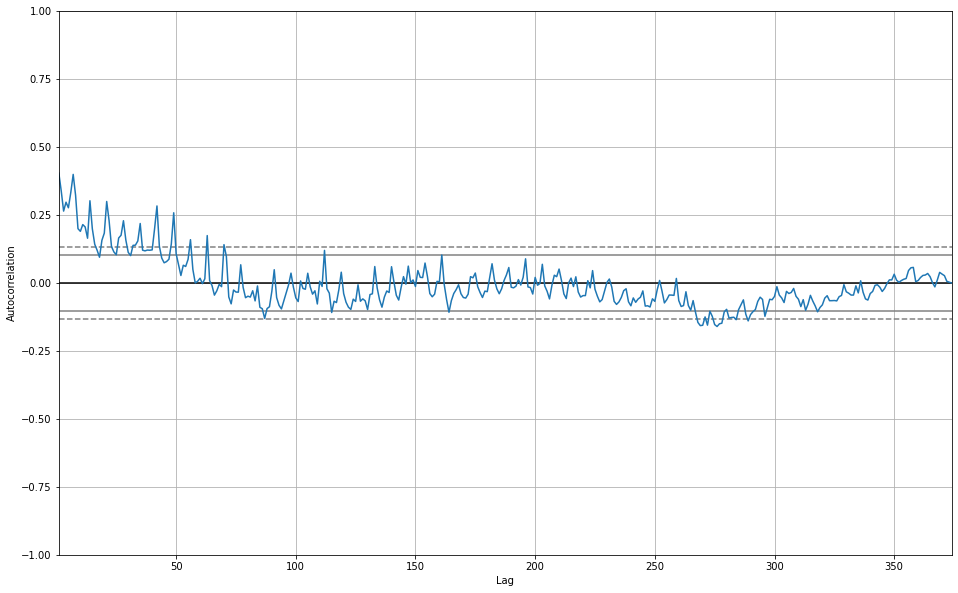

In [252]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(indexed_sumsales['Sales'])
#autocorrelation_plot(log_sum_sales_traindf)
plt.show()

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis.

    AR (Autoregression) : Model that shows a changing variable that regresses on its own lagged/prior values.
    I (Integrated) : Differencing of raw observations to allow for the time series to become stationary
    MA (Moving average) : Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

    p: the number of lag observations in the model; also known as the lag order.
    d: the number of times that the raw observations are differenced; also known as the degree of differencing.
    q: the size of the moving average window; also known as the order of the moving average.

Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

Auto Regressive Model

<img src="Image.PNG">

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

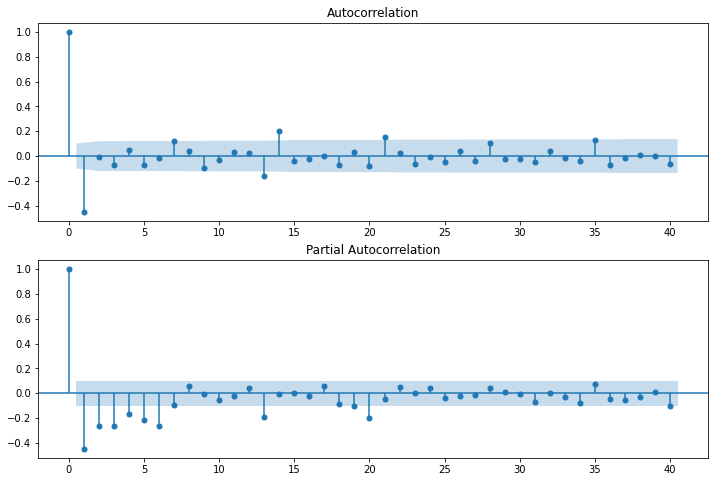

In [240]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(sumSalesDiffShifting,lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(sumSalesDiffShifting,lags=40,ax=ax2)

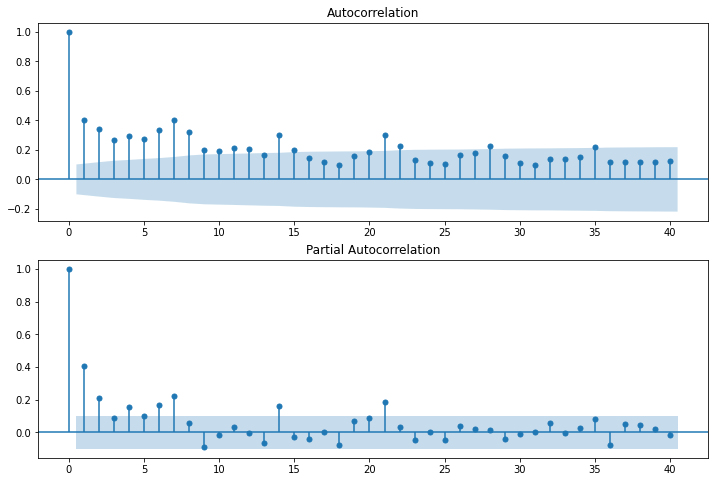

In [243]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(indexed_sumsales['Sales'],lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(indexed_sumsales['Sales'],lags=40,ax=ax2)

In [246]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
                        
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(indexed_sumsales['Sales'],order=(1,0,2))
model_fit=model.fit()
model_fit.summary()

C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  374
Model:                     ARMA(1, 2)   Log Likelihood               -4172.690
Method:                       css-mle   S.D. of innovations          16929.507
Date:                Fri, 21 Jan 2022   AIC                           8355.380
Time:                        20:18:59   BIC                           8375.002
Sample:                    12-01-2009   HQIC                          8363.171
                         - 12-09-2010                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          3.4e+04   6078.815      5.593      0.000    2.21e+04    4.59e+04
ar.L1.Sales     0.9782      0.017     56.412      0.000       0.944       1.012
ma.L1.Sales    -0.7649      0.054    -14.119      0.000      -0.871      -0.659
ma.L2.Sales    -0.0748      0.053     -1.413      0.158      -0.178       0.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0223           +0.0000j            1.0223            0.0000
MA.1            1.1729           +0.0000j            1.1729            0.0000
MA.2          -11.4059           +0.0000j           11.4059            0.5000
-----------------------------------------------------------------------------
"""

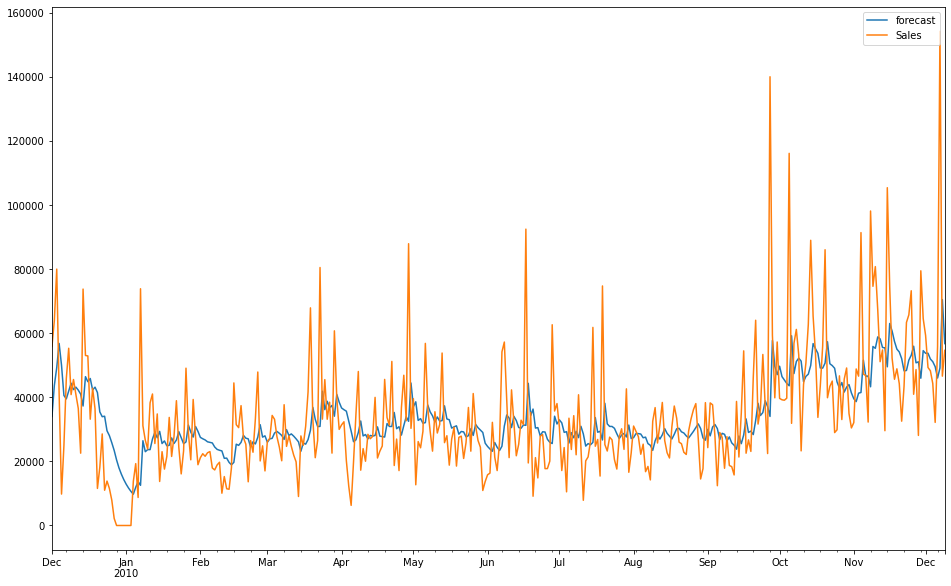

In [247]:
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred

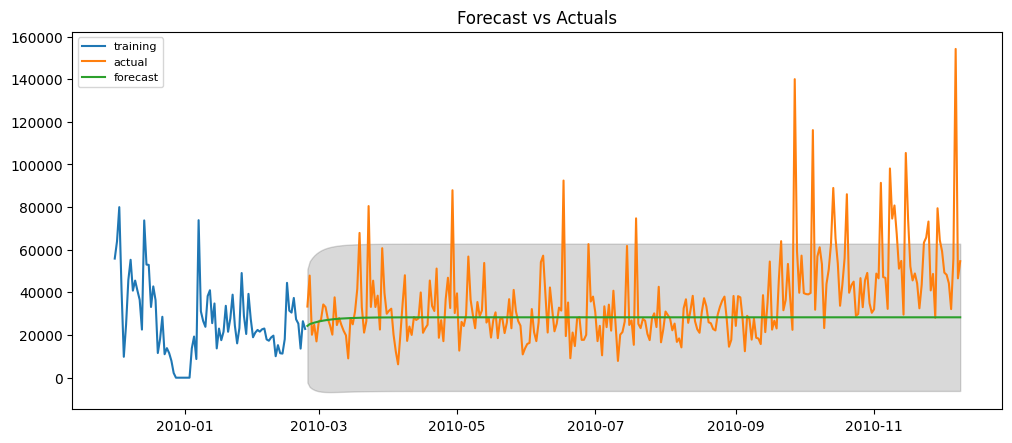

In [249]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = indexed_sumsales.Sales[:85]
test = indexed_sumsales.Sales[85:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 0, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(289, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [250]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


{'mape': 0.3596605362282089,
 'me': -7997.862264303255,
 'mae': 13523.75036436408,
 'mpe': -0.011127878143986874,
 'rmse': 21480.209640046374,
 'acf1': 0.3318225239311544,
 'corr': 0.08268858309568594,
 'minmax': 0.2832893026294807}

In [253]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(indexed_sumsales.Sales, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8363.313, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8977.252, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8502.798, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8808.402, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8362.768, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=8439.064, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8364.704, Time=0.24 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8360.274, Time=0.41 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8359.048, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=8647.829, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=8359.908, Time=0.66 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=8737.787, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=8360.932, Time=0.42 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8381.355, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)

In [292]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(indexed_sumsales['Sales'],order=(1, 0, 2),seasonal_order=(1,0,2,48))
res=model.fit()
res

C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\statespace\sarim

In [293]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  374
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 48)   Log Likelihood               -4175.298
Date:                            Fri, 21 Jan 2022   AIC                           8364.597
Time:                                    21:13:54   BIC                           8392.067
Sample:                                12-01-2009   HQIC                          8375.503
                                     - 12-09-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.004    228.178      0.000       0.990       1.008
ma.L1         -0.7878      0.058    -13.643      0.000      -0.901      -0.675
ma.L2         -0.0811      0.054     -1.494      0.135      -0.188       0.025
ar.S.L48       0.9257      2.673      0.346      0.729      -4.314       6.165
ma.S.L48      -0.8883      2.712     -0.328      0.743      -6.204       4.427
ma.S.L96      -0.0453      0.098     -0.463      0.643      -0.237       0.146
sigma2      3.077e+08   4.02e-07   7.65e+14      0.000    3.08e+08    3.08e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1470.19
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                             2.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.5e+29. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date_n'>

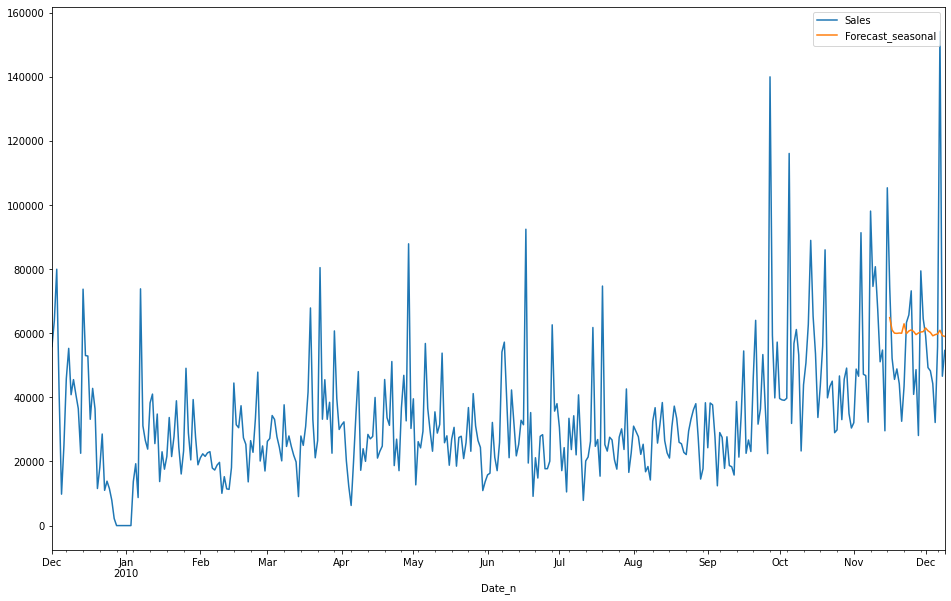

In [294]:
indexed_sumsales['Forecast_seasonal']=res.predict(start=350,end=374,dynamic=True)
indexed_sumsales[['Sales','Forecast_seasonal']].plot()

In [308]:
from pandas.tseries.offsets import DateOffset
future_dates=[indexed_sumsales.index[-1]+ DateOffset(days=x)for x in range(0,18)]

In [309]:
future_sales_df=pd.DataFrame(index=future_dates[1:],columns=indexed_sumsales.columns)

In [310]:
future_sales_df.head()


,Sales,Forecast_seasonal
2010-12-10,NaN,NaN
2010-12-11,NaN,NaN
2010-12-12,NaN,NaN
2010-12-13,NaN,NaN
2010-12-14,NaN,NaN


In [298]:
future_df=pd.concat([indexed_sumsales,future_sales_df])

,Sales,Forecast_seasonal,forecast
2009-12-01,55853.97,NaN,NaN
2009-12-02,63941.43,NaN,NaN
2009-12-03,79982.77,NaN,NaN
2009-12-04,41119.44,NaN,NaN
2009-12-05,9803.05,NaN,NaN


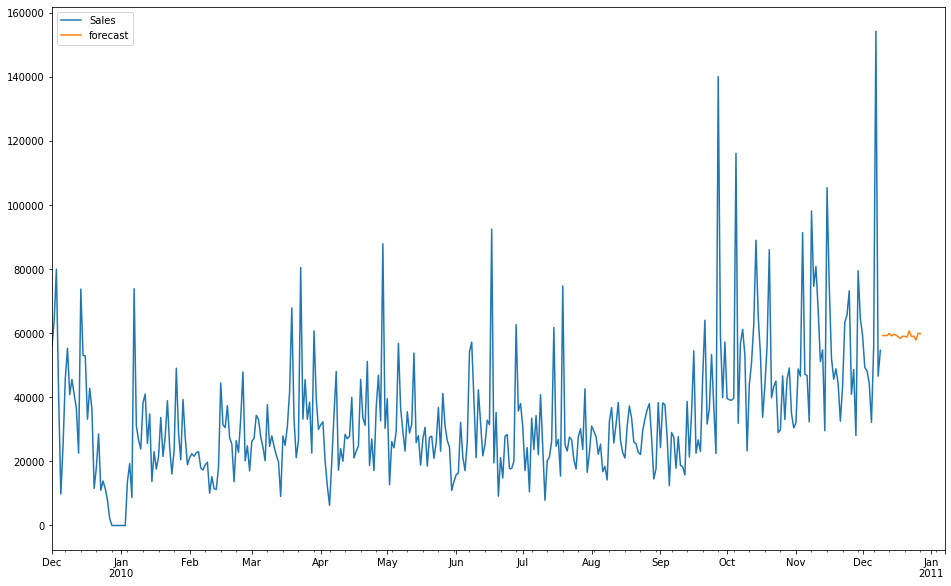

In [311]:
future_df['forecast'] = res.predict(start = 374, end = 391, dynamic= True)  
future_df[['Sales', 'forecast']].plot()
future_df.head()

In [314]:
future_df_pred = future_df.forecast
future_df_pred = future_df_pred[374:391]
future_df_pred_df = pd.DataFrame(future_df_pred)
future_df_pred_df['Date_n'] = future_df_pred_df.index
future_df_pred_df.reset_index()
future_df_pred_df.set_index('Date_n')
# future_df_pred_df

,forecast
Date_n,
2010-12-10,59265.543002
2010-12-11,59237.000435
2010-12-12,59237.540896
2010-12-13,59910.394369
2010-12-14,59159.916905
2010-12-15,59596.336069
2010-12-16,59437.201308
2010-12-17,58923.168634
2010-12-18,58367.431011


In [315]:
dfn = pd.merge(future_df_pred_df, indexed_testsales.reset_index(), how="left", on=["Date_n"])
dfn = dfn.set_index('Date_n')
dfn

,forecast,Sales
Date_n,,
2010-12-10,59265.543002,60960.930
2010-12-11,59237.000435,63273.726
2010-12-12,59237.540896,17417.220
2010-12-13,59910.394369,40634.080
2010-12-14,59159.916905,47666.170
2010-12-15,59596.336069,31445.550
2010-12-16,59437.201308,50371.450
2010-12-17,58923.168634,47302.470
2010-12-18,58367.431011,35357.128


In [316]:
Y_actual = dfn.Sales.values
Y_Predicted = dfn.forecast.values

forecast_accuracy(Y_Predicted , Y_actual)


C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\saksh\.conda\envs\sales\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


{'mape': 2.725462740355178,
 'me': 27862.167913961875,
 'mae': 28536.53409786304,
 'mpe': 2.7146852275561155,
 'rmse': 33781.31770741496,
 'acf1': 0.3318225239311544,
 'corr': -0.13334137852457145,
 'minmax': 0.4811752743444343}

In [256]:
#Trying to test stationarity by ourselves by using Sales column and using a regression model with target variable 
# being difference between two rows and independent variable being the actual Sales

# #New column named as Diff_Value is made using the difference between two consecutive values of Sales
# indexed_sumsales["Diff_Value"] = indexed_sumsales["Sales"].diff()
# #print(indexed_sumsales.head(), "\n")

# #Target variable is set by applying filter on Diff_Value to remove all nan values but it includes only one nan which was generated
# # after difference calculation.
# diff_values = indexed_sumsales["Diff_Value"].values
# Target = diff_values[~np.isnan(diff_values)]
# #print(Target, "\n")

# #Then independent variable i.e sales values are taken by removing last value as one nan value was removed from Target so to match 
# # the total number of independent values with Target values, we have done this.
# inde_values = indexed_sumsales["Sales"].values
# ind_vals = inde_values[:-1]
# #print(ind_vals, "\n")

# #Constant is added using add_constant of statsmodels.api
# import statsmodels.api as sm
# X = sm.add_constant(ind_vals)

# #Model is generated using OLS i.e Ordinary Least Square Method and results are obtained by fitting the model.
# model = sm.OLS(Target,X)
# results = model.fit()

# print(results.summary())